dar unsupervised bedoone tajrobe ghabli olgoo ha ro peyda mikone bedoone inke behesh begim

in kar ro ba estefade az shebahate beyne dade ha anjam mide va oon haro be khooshe haye mokhtalefi tabdil mikone

* supervised learning   -->   classification
* unsupervised learning -->   Clustering

## K-Means

dar in algorithm az ghabl bayad tedade khooshe haro entekhab konim (hamoon **K**) va nabayad az tedade data haye ma bishtar bashe

steps:
1. marhalae initialization ke khodesh random **K** ta haste markazi ro entekhab mikone az beyne data
2. marhale assignment ke haste haro be marakeze hastei ke shebahat tooshoon vojood dare ekhtesas midim (be dade hai ke fasele kamtari daran be aza)
3. haste talash mikone ke khodesho dar markaze khooshe gharar bede va jabeja mishe va azaye khooshe khodeshono dobare update mikonan (bargashtan be marhale 2) chon shayad ba taghire markaze khooshe, khoosheye oon data avaz beshe ( be ye khooshe dg nazdik tar bashe )

_bugi ke vojod dare ine ke khooshe bandie ma kheyli kheyli be oon markaze khooshei ke too marhale 1 be soorate random entekhab mishe bastegi dare_

in site kheyli ghashang ravande K-Means ro tozih dade

http://tech.nitoyon.com/en/blog/2013/11/07/k-means

In [3]:
# berim bebinim too dataset iris dastan chie
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()

In [8]:
# n_clusters hamoon K hast
KM = KMeans(n_clusters=3)
KM.fit(iris.data)
labels = KM.predict(iris.data)
center_of_clusters = KM.cluster_centers_

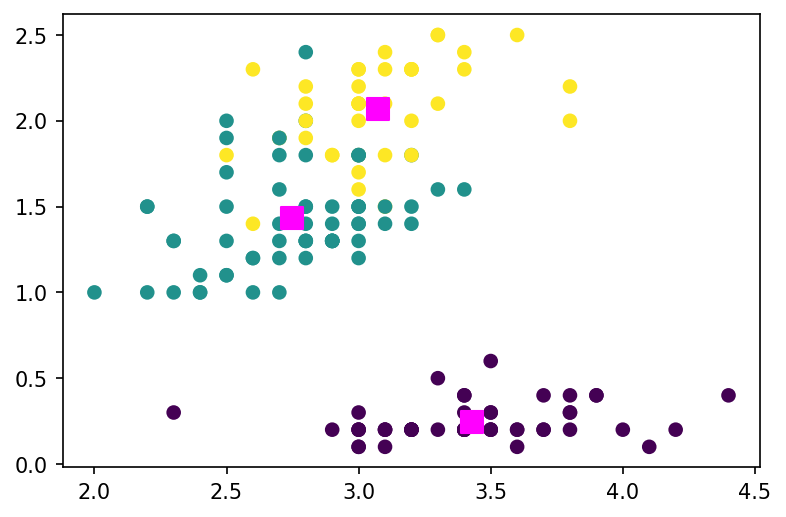

In [41]:
plt.figure(dpi=150)

# dade haye iris ro mirizim too plt scatter
plt.scatter(iris.data[:, 1], iris.data[:, 3], c=labels)
# inja ham markaze khooshe haro mirizim too scatter
plt.scatter(center_of_clusters[:, 1], center_of_clusters[:, 3],
           marker='s', s=120, c='magenta') 
plt.show()

hala dastan ine chejoori befahmim chanta cluster niaz darim bara in datamoon?

yeki az behtarin ravesha vase fahmidanesh __inertia__ hast
harchi inertia kamtar bashe neshon mide clustering behtar etefagh oftade

inertia dare fasele markaze har nemoone az markaze cluster ro neshoon mide pas harchi kamtar bashe behtare

In [22]:
KM.inertia_

78.85144142614601

hala inke befahmim in adad khoobe ya bad:

bayad halghe bezanim ba K haye mokhtalef va ooni ke kamtare ro entekhab konim

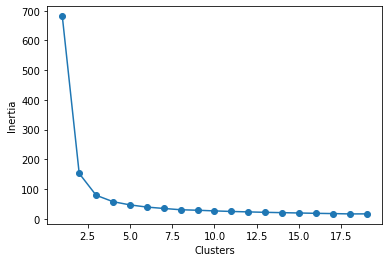

In [39]:
inertias = []
for k in range(1, 20):
    KM = KMeans(n_clusters=k)
    KM.fit(iris.data)
    inertias.append(KM.inertia_)
    
plt.plot(range(1, 20), inertias, 'o-')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

inja age deghat konim mibinim inertia az 2 be bad kaheshe kheyli kami dashte

pas be sarfe nist K az 3 bozorg tar beshe choon darim modelemon ro pichide tar mikonim pas entekhabe 3 behtarin entekhabemoone

## Heirarchical Clustering (khooshe bandi selsele maratebi)

too in ravesh har data == 1 cluster
ye meyare shebahat dar nazar migirim
bad data haye shabih be ham tashkile cluster midan va be ham join mishan 

masalan in datamone [iran, india, italy, France, Greece]
meyare shebahatemon ro gharei ke on keshvar tooshe entekhab mikonim

[iran, hend] [france, italy, Greece]
<img src="images/dendrogram.png" width="600">


In [69]:
# baraye dorost kardane heirarchical cluster az scipy estefade mikonim 

from scipy .cluster.hierarchy import linkage, dendrogram, fcluster
# linkage = tabe khooshe bandi
# dendrogram ham mesle axe balae

anvae method haye linkage:

<img src="images/linkages_methods.jpeg" width="600">


In [48]:
hierarchical = linkage(iris.data, method="complete")

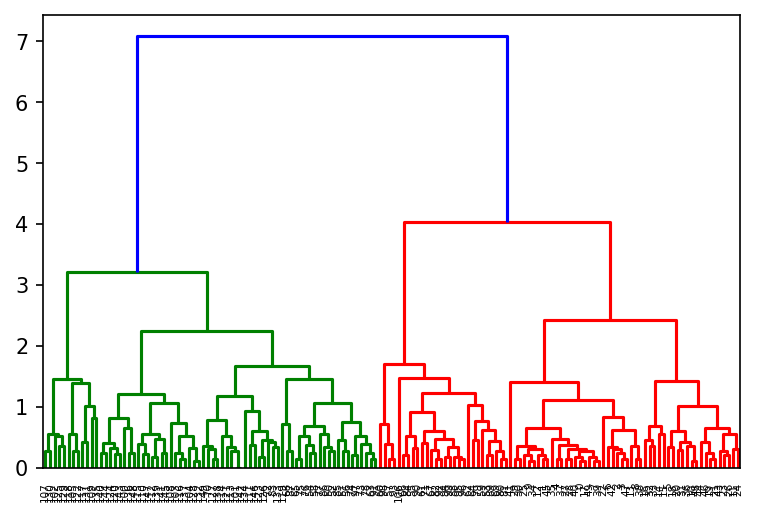

In [51]:
# namayeshe dendrogram

plt.figure(dpi=150)
dendrogram(hierarchical)
hplt.show()

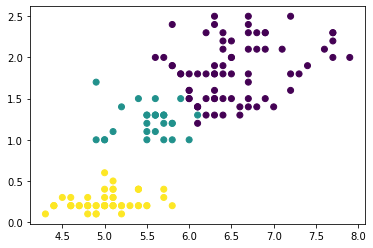

In [70]:
""" 
    harchi x ro koochik tar konim be laye haye avalie khooshe 
    bandi nazdik tar mishim 
    x mishe hamoon level e khooshe bandimoon
"""
x = 4
labels = fcluster(hierarchical, x, criterion='distance')
plt.scatter(iris.data[:,0], iris.data[:, 3], c=labels)
plt.show()

## Meanshift
yeki dg az algorithm haye clusteringe ke shabihe K-Means hast
tafavotesh ham niaz nist tedade cluster haro moshakhas konim

too marhale aval shabihe Heirarchical e har data yek cluster hesab mishe
<div>
    <img src="images/meanshift1.png" width="150">
    <img src="images/meanshift2.png" width="150">
    <img src="images/meanshift3.png" width="150">
</div>

har data shoae did dare nesbat be atrafesh (dayere doresh) vali ma felan yeki az data haro entekhab mikonim ba shoae doresh ( in shoae did ba bandwidth moshakhas mishe be onvane hyperparam )

miad atrafesho mibine va data hayi ke too shae doresh hastano peyda mikone khodesh ro jabeja mikone va mibare be samte markaze data hai ke dide

hala too marhale dovom data dobare check mikone che datai atrafeshe va age data jadidi bood baz khodesho mibare be markaze oon data ha va in amaliat tekrar mishe

<img src="images/meanshift4.png" width="150">

In [97]:
from sklearn.cluster import MeanShift
MS = MeanShift(bandwidth=None) # bayad motale konam rajebesh
MS.fit(iris.data)
labels = MS.labels_
center_of_clusters = MS.cluster_centers_

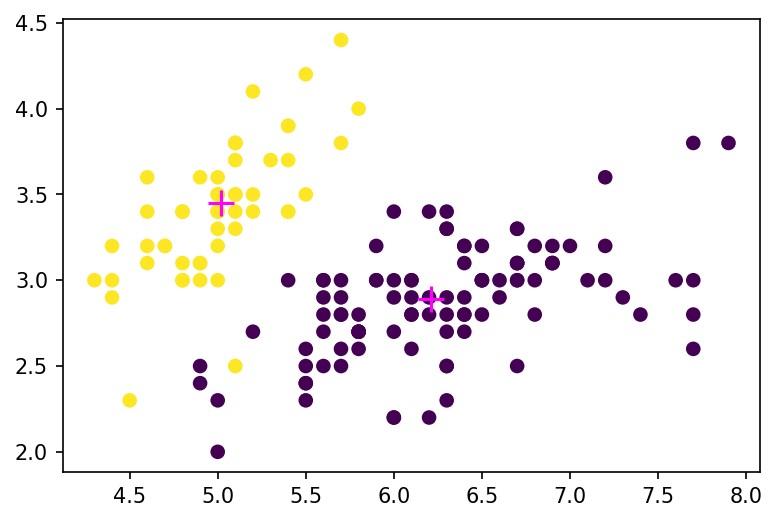

In [95]:
plt.figure(dpi=150)
plt.scatter(iris.data[:,0], iris.data[:,1], c=labels)
plt.scatter(center_of_clusters[:,0], center_of_clusters[:,1], marker='+', c ="magenta",
           s=150)
plt.show()